In [4]:
import pandas as pd
data = pd.read_csv('D:\\XY\\花旗年龄\\13年年龄标题有问题，代码和数据都在这\\hq2013.csv')

C:\Users\21523\AppData\Local\Temp\ipykernel_18352\2664302423.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\\XY\\花旗年龄\\13年年龄标题有问题，代码和数据都在这\\hq2013.csv')


In [8]:
data=data['birth year\tgender\r\nbirth year\tgender\r\nbirth_year_gender']

In [9]:
data

0          1984.0
1             NaN
2          1960.0
3          1983.0
4             NaN
            ...  
7093207      1973
7093208      1986
7093209      1985
7093210      1955
7093211      1986
Name: birth year\tgender\r\nbirth year\tgender\r\nbirth_year_gender, Length: 7093212, dtype: object

In [21]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('D:\\XY\\花旗年龄\\13年年龄标题有问题，代码和数据都在这\\hq2013.csv')

# Rename the column
df.rename(columns={'birth year\tgender\r\nbirth year\tgender\r\nbirth_year_gender': 'birth_year_gender'}, inplace=True)

# Drop rows with missing values in 'birth_year_gender' column
df.dropna(subset=['birth_year_gender'], inplace=True)

# Convert 'birth_year_gender' column to string
df['birth_year_gender'] = df['birth_year_gender'].astype(str)

# Extract numeric part of the string and handle NaN values
df['birth_year_gender'] = df['birth_year_gender'].apply(lambda x: int(x.split('.')[0]) if '.' in x else None)

# Calculate age
df['age'] = 2013 - df['birth_year_gender']

# Save the DataFrame back to the CSV file
df.to_csv('D:\\XY\\花旗年龄\\13年年龄标题有问题，代码和数据都在这\\hq2013.csv', index=False)

C:\Users\21523\AppData\Local\Temp\ipykernel_18352\3762185718.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\\XY\\花旗年龄\\13年年龄标题有问题，代码和数据都在这\\hq2013.csv')


In [40]:
import pandas as pd

# 加载elon_elat_data.csv文件和浙江交通栅格.csv文件
elon_elat_data = pd.read_csv(r'D:\XY\花旗年龄\hq2020.csv')
grid_data = pd.read_csv(r'C:\Users\21523\Desktop\newyork_culture1.csv')
elon_elat_data = elon_elat_data[['end_station_longitude', 'end_station_latitude', 'age']]

# 假设elon_elat_data.csv文件里有elon和elat两列分别代表经度和纬度
# 假设浙江交通栅格.csv文件里有四列：min_lon、max_lon、min_lat、max_lat

# 筛选在栅格范围内的数据点
filtered_data = pd.DataFrame()
for index, row in grid_data.iterrows():
    grid_min_lon = row['min_lon']
    grid_max_lon = row['max_lon']
    grid_min_lat = row['min_lat']
    grid_max_lat = row['max_lat']
    
    grid_filtered_data = elon_elat_data[(elon_elat_data['end_station_longitude'] >= grid_min_lon) & 
                                         (elon_elat_data['end_station_longitude'] <= grid_max_lon) & 
                                         (elon_elat_data['end_station_latitude'] >= grid_min_lat) & 
                                         (elon_elat_data['end_station_latitude'] <= grid_max_lat)]
    
    filtered_data = pd.concat([filtered_data, grid_filtered_data])

# 计算age列不同年龄段的占比，区间是10
# 假设筛选结果中包含了 "age" 列
# 计算不同年龄段的数量
age_bins = range(0, 101, 10)  # 创建区间
filtered_data['age_group'] = pd.cut(filtered_data['age'], bins=age_bins, right=False)  # 划分年龄段
age_counts = filtered_data['age_group'].value_counts().sort_index()  # 计算每个年龄段的数量
total_count = age_counts.sum()  # 总人数

# 计算每个年龄段的占比
age_percentage = (age_counts / total_count) * 100

# 输出筛选结果
print("筛选结果:")
print(filtered_data)

# 输出不同年龄段的占比
print("\n不同年龄段的占比:")
for age_group, count, percentage in zip(age_counts.index, age_counts, age_percentage):
    print(f"年龄段 {age_group}: {count} 人, 占比 {percentage:.2f}%")

筛选结果:
          end_station_longitude  end_station_latitude  age age_group
372                  -73.986317             40.692362   64  [60, 70)
390                  -73.983625             40.694749   32  [30, 40)
404                  -73.984284             40.692216   30  [30, 40)
831                  -73.983625             40.694749   28  [20, 30)
1011                 -73.983625             40.694749   18  [10, 20)
...                         ...                   ...  ...       ...
19504237             -73.910900             40.838990   36  [30, 40)
19505105             -73.903743             40.834857   23  [20, 30)
19505169             -73.907301             40.836179   27  [20, 30)
19505230             -73.910489             40.837576   75  [70, 80)
19505642             -73.908345             40.837213   22  [20, 30)

[3132299 rows x 4 columns]

不同年龄段的占比:
年龄段 [0, 10): 0 人, 占比 0.00%
年龄段 [10, 20): 39774 人, 占比 1.27%
年龄段 [20, 30): 842477 人, 占比 26.91%
年龄段 [30, 40): 948483 人, 占比 30.30%


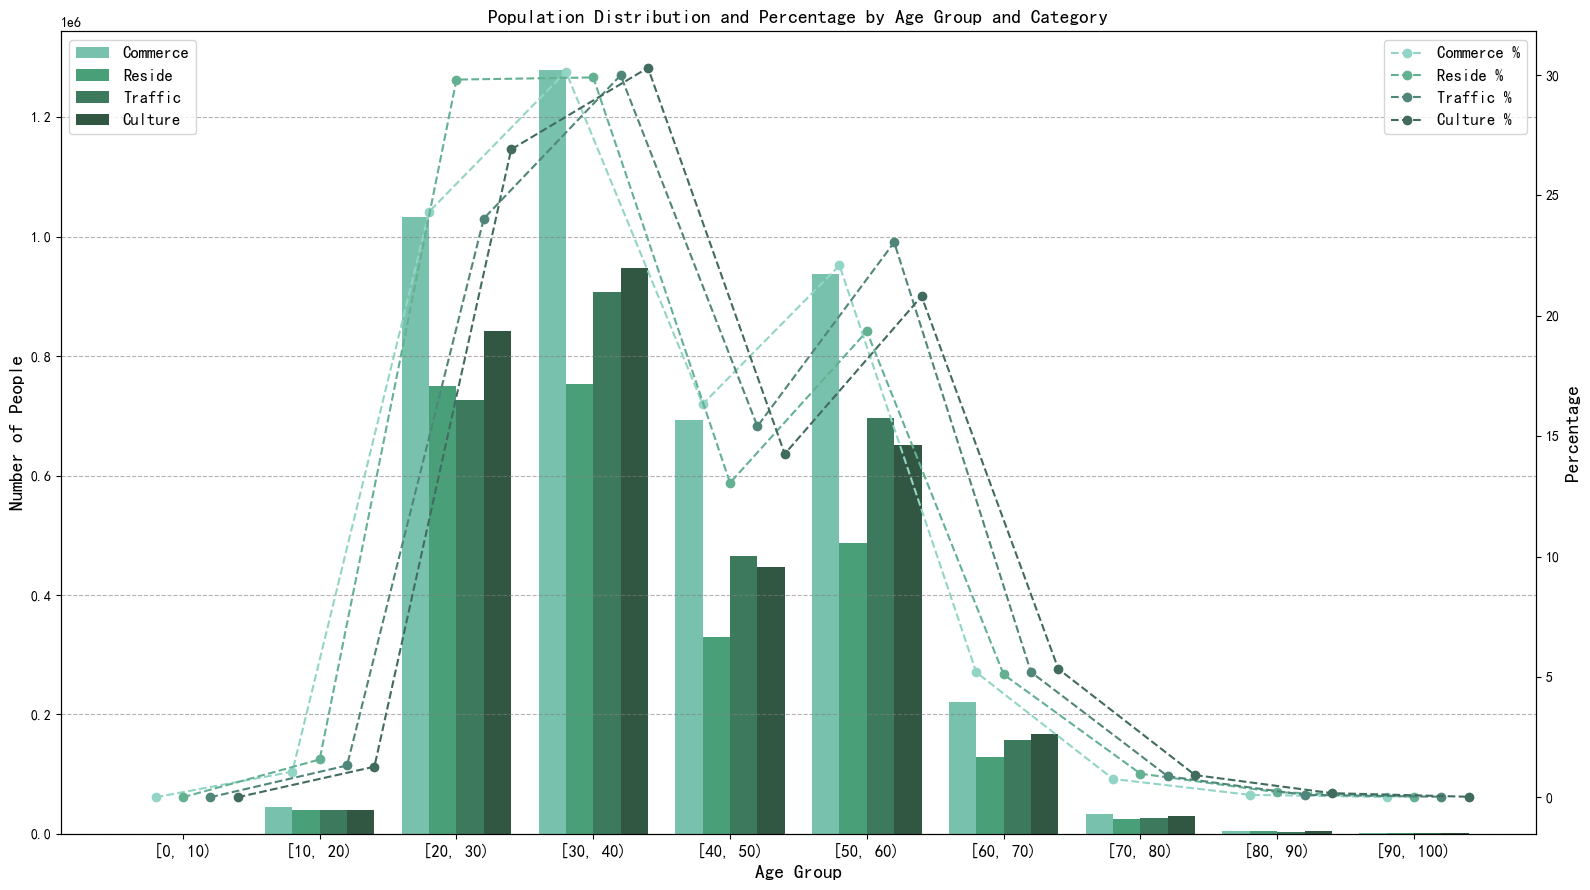

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 准备数据
data = {
    "Age Group": ["[0, 10)", "[10, 20)", "[20, 30)", "[30, 40)", "[40, 50)", "[50, 60)", "[60, 70)", "[70, 80)", "[80, 90)", "[90, 100)"],
    "Commerce": [0, 45102, 1033253, 1280319, 693789, 938293, 220650, 32302, 4225, 562],
    "Reside": [0, 39631, 750631, 753047, 328885, 487230, 128422, 24560, 5342, 558],
    "Traffic": [0, 39989, 727134, 906979, 466045, 697029, 157375, 26218, 3079, 511],
    "Culture": [0, 39774, 842477, 948483, 446498, 651612, 166967, 28928, 5337, 486],
    "Commerce %": [0.00, 1.06, 24.32, 30.14, 16.33, 22.09, 5.19, 0.76, 0.10, 0.01],
    "Reside %": [0.00, 1.57, 29.81, 29.90, 13.06, 19.35, 5.10, 0.98, 0.21, 0.02],
    "Traffic %": [0.00, 1.32, 24.04, 29.99, 15.41, 23.05, 5.20, 0.87, 0.10, 0.02],
    "Culture %": [0.00, 1.27, 26.91, 30.30, 14.26, 20.81, 5.33, 0.92, 0.17, 0.02]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置图形和坐标轴
fig, ax1 = plt.subplots(figsize=(16, 9))
index = range(len(df['Age Group']))
bar_width = 0.2

# 绿色系深浅色调
colors = ['#78c2ad', '#49a078', '#3d7a5d', '#315641']
line_colors = ['#92d5c6', '#63b092', '#50857a', '#416b5f']

# 绘制条形图
bars = []
for i, category in enumerate(['Commerce', 'Reside', 'Traffic', 'Culture']):
    bars.append(ax1.bar([p + i * bar_width for p in index], df[category], bar_width, label=category, color=colors[i]))

ax1.set_xlabel('Age Group', fontsize=14)  # 调整横坐标标签字体大小
ax1.set_ylabel('Number of People', fontsize=14)  # 调整纵坐标标签字体大小
ax1.set_title('Population Distribution and Percentage by Age Group and Category', fontsize=14)
ax1.set_xticks([p + 1.5 * bar_width for p in index])
ax1.set_xticklabels(df['Age Group'], rotation=0, fontsize=12)  # 调整横坐标刻度字体大小
ax1.legend(loc='upper left', fontsize=12)

# 添加网格线
ax1.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.6)

# 添加折线图
ax2 = ax1.twinx()
lines = []
for i, category in enumerate(['Commerce %', 'Reside %', 'Traffic %', 'Culture %']):
    # 计算每个条形图的中心位置
    x_positions = [p + 0.5 * bar_width + i * bar_width for p in index]
    lines.append(ax2.plot(x_positions, df[category], label=f'{category}', color=line_colors[i], marker='o', linestyle='--'))

ax2.set_ylabel('Percentage', fontsize=14)  # 调整纵坐标标签字体大小
ax2.legend(loc='upper right', fontsize=12)

plt.savefig('/Users/21523/Desktop/population_distribution_2020.png', dpi=600, bbox_inches='tight')
# 显示图形
plt.tight_layout()
plt.show()